# Notebook 4: ML Model Evaluation and Visualization
This notebook performs the following tasks:
1. Loads the trained model and scaler.
2. Evaluates the model using test data.
3. Visualizes the model's performance through various plots:
   - Actual vs. Predicted Prices
   - Residual Distribution
   - Residuals vs. Predicted Prices


## Importing Necessary Libraries
Libraries used:
- `pandas`: For data handling.
- `joblib`: To load the trained model and scaler.
- `matplotlib`: For creating plots.
- `scikit-learn`: For evaluation metrics (e.g., MAE, MSE, R²).


In [1]:
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sqlite3

## Loading Data, Model, and Scaler
- Loads the processed stock data from the SQLite database.
- Loads the saved machine learning model (`stock_price_model.pkl`).
- Loads the saved scaler (`scaler.pkl`) for consistent normalization.

In [2]:
# Step 1: Load processed data and trained model
db_path = "database/stocks_data.db"  # Updated database name
with sqlite3.connect(db_path) as conn:
    query = "SELECT * FROM processed_stocks"
    data = pd.read_sql(query, conn)

# Load the trained model and scaler
model = joblib.load('models/stock_price_model.pkl')  # Load the trained model
scaler = joblib.load('models/scaler.pkl')  # Load the scaler

## Preparing Data for Evaluation
- Extracts features and target variables from the dataset.
- Applies the previously saved scaler to normalize the features for evaluation.


In [3]:
# Step 2: Define features and target
features = ['7-day MA', '14-day MA', 'Volatility', 'Lag_1', 'Lag_2']
target = 'Adj Close'

X = data[features]
y = data[target]

# Step 3: Normalize the features
X_scaled = scaler.transform(X)  # Use the loaded scaler to transform the features

## Model Evaluation
Uses the test data to evaluate the model's performance using:
1. **Mean Absolute Error (MAE)**: Average of absolute differences between actual and predicted values.
2. **Mean Squared Error (MSE)**: Average of squared differences between actual and predicted values.
3. **R-squared (R²)**: Proportion of variance in the target variable explained by the model.

In [4]:
# Step 4: Predict using the trained model
y_pred = model.predict(X_scaled)

# Step 5: Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 2.37
R-squared (R²): 1.00


## Actual vs. Predicted Prices
- Scatter plot comparing actual stock prices (`Adj Close`) with the model's predictions.
- Includes a red dashed line indicating the ideal fit where predicted equals actual.

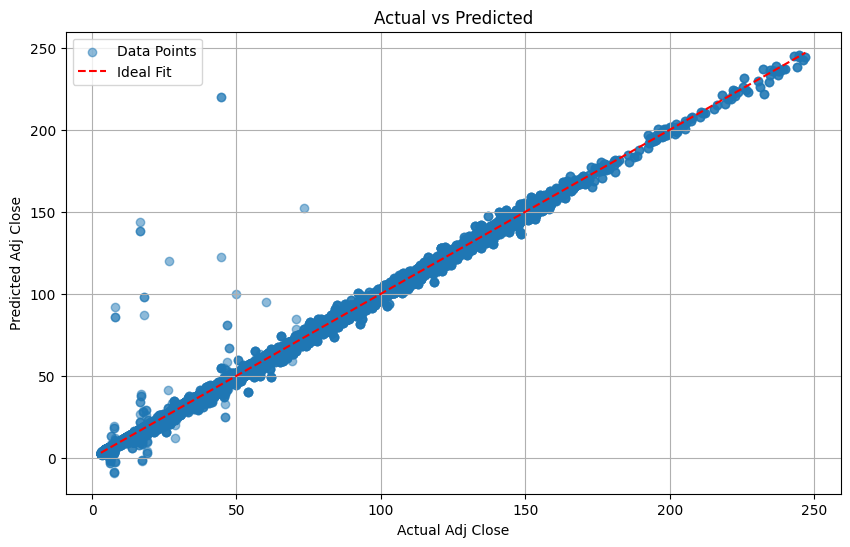

In [5]:
# Step 6: Visualize results
# 6.1: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, label='Data Points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Adj Close')
plt.ylabel('Predicted Adj Close')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

## Residual Distribution
- Histogram of residuals (differences between actual and predicted prices).
- The red dashed line at zero represents perfect predictions.
- Helps detect bias or patterns in model errors.


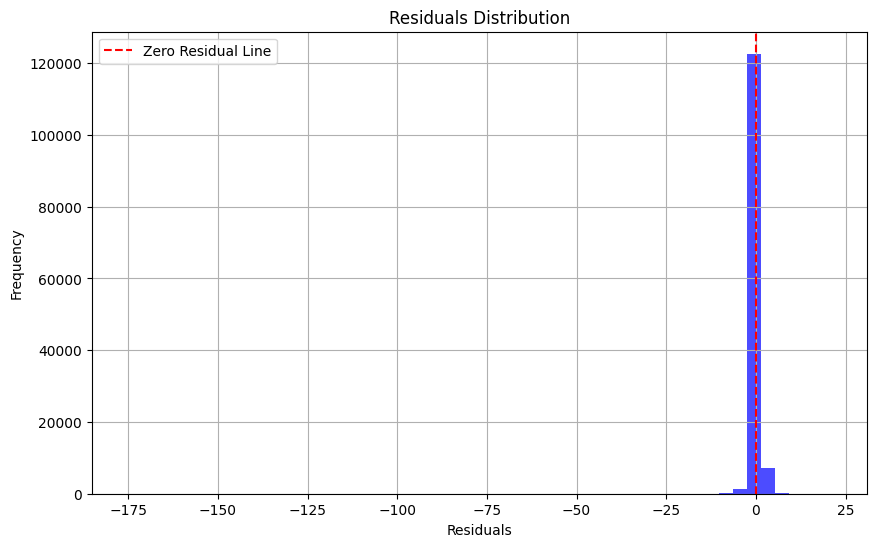

In [6]:
# 6.2: Residuals Distribution
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.legend()
plt.grid(True)
plt.show()


## Residuals vs. Predicted Prices
- Scatter plot showing residuals against predicted prices.
- The red dashed line at zero indicates no residual.
- Assesses if errors are evenly distributed across the range of predictions.


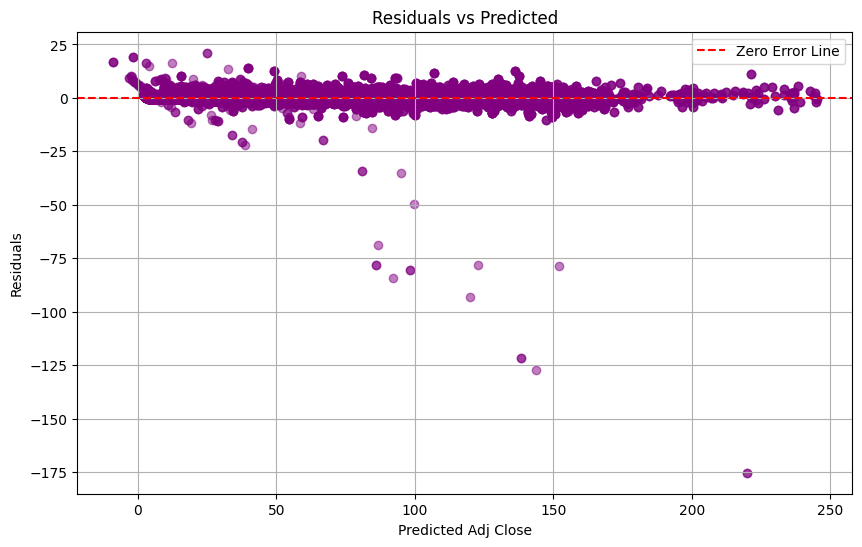

In [7]:
# 6.3: Residuals vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Adj Close')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.legend()
plt.grid(True)
plt.show()